# This Jupyter notebook is used only for building graphs. The analysis and insights are presented in the act_report.pdf file

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import datetime as dt

In [50]:
# Loading data from the csv file
df_master = pd.read_csv("twitter_archive_master.csv")

In [51]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 12 columns):
tweet_id            1975 non-null int64
timestamp           1975 non-null object
source              1975 non-null object
text                1975 non-null object
expanded_urls       1972 non-null object
name                1338 non-null object
dog_stage           326 non-null object
rating              1975 non-null float64
breed_prediction    1618 non-null object
confidence_level    1618 non-null float64
favorite_count      1975 non-null int64
retweet_count       1975 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 185.2+ KB


In [52]:
# Change datatypes
df_master.tweet_id = df_master.tweet_id.astype(str)
df_master["timestamp"] = pd.to_datetime(df_master["timestamp"])
df_master.dog_stage = df_master.dog_stage.astype("category")
df_master.source = df_master.source.astype("category")

In [53]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 12 columns):
tweet_id            1975 non-null object
timestamp           1975 non-null datetime64[ns]
source              1975 non-null category
text                1975 non-null object
expanded_urls       1972 non-null object
name                1338 non-null object
dog_stage           326 non-null category
rating              1975 non-null float64
breed_prediction    1618 non-null object
confidence_level    1618 non-null float64
favorite_count      1975 non-null int64
retweet_count       1975 non-null int64
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 158.6+ KB


# MATPLOTLIB STYLES

In [54]:
# Check available styles
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [55]:
# Pick a style
plt.style.use("seaborn-muted")

In [56]:
# set of possible colors
print (plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#4878CF', '#6ACC65', '#D65F5F', '#B47CC7', '#C4AD66', '#77BEDB']


# ANALYSIS

#  What are the most used resources for posting tweets?

In [57]:
df_master.source.value_counts()

Twitter for Iphone     1846
Vine - Make a Scene      89
Twitter Web Client       30
TweetDeck                10
Name: source, dtype: int64

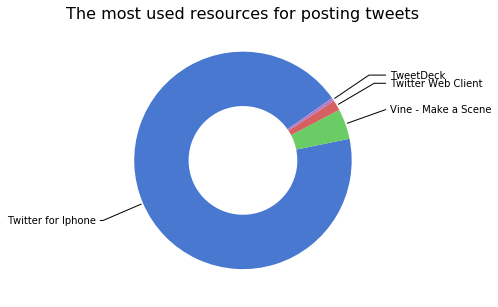

In [58]:
# Source of code:
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py

fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(aspect="equal"))

sources = df_master.source.value_counts().keys()
data = df_master.source.value_counts().values

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=35)

kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2.0 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(sources[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("The most used resources for posting tweets", fontsize = 16)
plt.show()

# Number of tweets made per month

In [59]:
# Set timestamp column as an index
df_master.index = df_master["timestamp"]

In [60]:
df_master = df_master.sort_index()

In [61]:
df_master

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,rating,breed_prediction,confidence_level,favorite_count,retweet_count
timestamp,,,,,,,,,,,,
2015-11-15 22:32:08,666020888022790149,2015-11-15 22:32:08,Twitter for Iphone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,NaN,NaN,0.8,Welsh springer spaniel,0.465074,2541,507
2015-11-15 23:05:30,666029285002620928,2015-11-15 23:05:30,Twitter for Iphone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,NaN,NaN,0.7,Redbone,0.506826,129,47
2015-11-15 23:21:54,666033412701032449,2015-11-15 23:21:54,Twitter for Iphone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,NaN,NaN,0.9,German shepherd,0.596461,125,44
2015-11-16 00:30:50,666050758794694657,2015-11-16 00:30:50,Twitter for Iphone,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,NaN,NaN,1.0,Bernese mountain dog,0.651137,132,59
2015-11-16 00:49:46,666055525042405380,2015-11-16 00:49:46,Twitter for Iphone,Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,NaN,NaN,1.0,Chow,0.692517,432,243
2015-11-16 00:55:59,666057090499244032,2015-11-16 00:55:59,Twitter for Iphone,My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,NaN,NaN,0.9,Golden retriever,0.007959,294,141
2015-11-16 01:01:59,666058600524156928,2015-11-16 01:01:59,Twitter for Iphone,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,NaN,NaN,0.8,Miniature poodle,0.201493,111,57
2015-11-16 01:22:45,666063827256086533,2015-11-16 01:22:45,Twitter for Iphone,This is the happiest dog you will ever see. Ve...,https://twitter.com/dog_rates/status/666063827...,NaN,NaN,1.0,Golden retriever,0.775930,471,215
2015-11-16 01:52:02,666071193221509120,2015-11-16 01:52:02,Twitter for Iphone,Here we have a northern speckled Rhododendron....,https://twitter.com/dog_rates/status/666071193...,NaN,NaN,0.9,Gordon setter,0.503672,145,59


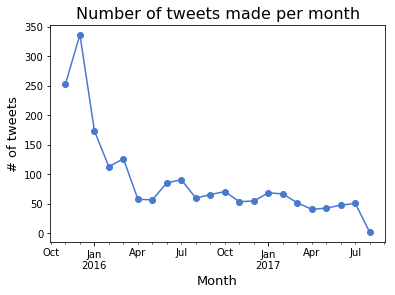

In [62]:
df_master.resample("M")["tweet_id"].count().plot(style = "-ko", color = "#4878CF")
plt.title("Number of tweets made per month", fontsize = 16)
plt.xlabel("Month", fontsize = 13)
plt.ylabel("# of tweets", fontsize = 13);

# Number of likes per tweet over time

In [63]:
# documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html
df_master['rolling_mean_likes'] = df_master['favorite_count'].rolling(window = 80).mean()
df_master

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,rating,breed_prediction,confidence_level,favorite_count,retweet_count,rolling_mean_likes
timestamp,,,,,,,,,,,,,
2015-11-15 22:32:08,666020888022790149,2015-11-15 22:32:08,Twitter for Iphone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,NaN,NaN,0.8,Welsh springer spaniel,0.465074,2541,507,NaN
2015-11-15 23:05:30,666029285002620928,2015-11-15 23:05:30,Twitter for Iphone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,NaN,NaN,0.7,Redbone,0.506826,129,47,NaN
2015-11-15 23:21:54,666033412701032449,2015-11-15 23:21:54,Twitter for Iphone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,NaN,NaN,0.9,German shepherd,0.596461,125,44,NaN
2015-11-16 00:30:50,666050758794694657,2015-11-16 00:30:50,Twitter for Iphone,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,NaN,NaN,1.0,Bernese mountain dog,0.651137,132,59,NaN
2015-11-16 00:49:46,666055525042405380,2015-11-16 00:49:46,Twitter for Iphone,Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,NaN,NaN,1.0,Chow,0.692517,432,243,NaN
2015-11-16 00:55:59,666057090499244032,2015-11-16 00:55:59,Twitter for Iphone,My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,NaN,NaN,0.9,Golden retriever,0.007959,294,141,NaN
2015-11-16 01:01:59,666058600524156928,2015-11-16 01:01:59,Twitter for Iphone,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,NaN,NaN,0.8,Miniature poodle,0.201493,111,57,NaN
2015-11-16 01:22:45,666063827256086533,2015-11-16 01:22:45,Twitter for Iphone,This is the happiest dog you will ever see. Ve...,https://twitter.com/dog_rates/status/666063827...,NaN,NaN,1.0,Golden retriever,0.775930,471,215,NaN
2015-11-16 01:52:02,666071193221509120,2015-11-16 01:52:02,Twitter for Iphone,Here we have a northern speckled Rhododendron....,https://twitter.com/dog_rates/status/666071193...,NaN,NaN,0.9,Gordon setter,0.503672,145,59,NaN


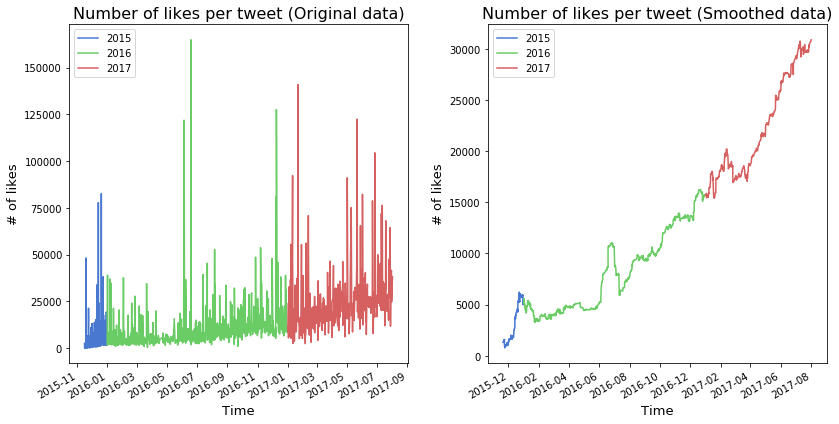

In [64]:
# Create a new figure
plt.figure(1, figsize=(12, 6))  

# Add a subplot to the current figure.
plt.subplot(121)
df_master.resample("Y")["favorite_count"].plot(kind = "line")
plt.title("Number of likes per tweet (Original data)", fontsize = 16)
plt.xlabel("Time", fontsize = 13)
plt.ylabel("# of likes", fontsize = 13)
plt.legend(["2015", "2016", "2017"], loc = "upper left")

# Add a subplot to the current figure.
plt.subplot(122)
df_master.resample("Y")["rolling_mean_likes"].plot(kind = "line")
plt.title("Number of likes per tweet (Smoothed data)", fontsize = 16)
plt.xlabel("Time", fontsize = 13)
plt.ylabel("# of likes", fontsize = 13)
plt.legend(["2015", "2016", "2017"], loc = "upper left")

plt.tight_layout()


In [65]:
df_master[df_master["favorite_count"] == df_master["favorite_count"].max()]

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,rating,breed_prediction,confidence_level,favorite_count,retweet_count,rolling_mean_likes
timestamp,,,,,,,,,,,,,
2016-06-18 18:26:18,744234799360020481,2016-06-18 18:26:18,Twitter for Iphone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,NaN,doggo,1.3,Labrador retriever,0.825333,164865,84042,10642.1375


# Number of retweets per tweet over time

In [66]:
df_master["rolling_mean_retweets"] = df_master["retweet_count"].rolling(window = 120).mean()

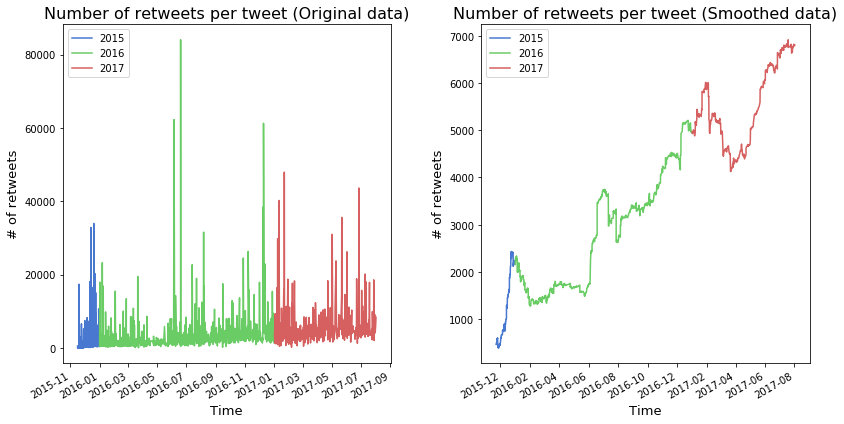

In [67]:
# Create a new figure
plt.figure(1, figsize=(12, 6))  

# Add a subplot to the current figure.
plt.subplot(121)
df_master.resample("Y")["retweet_count"].plot(kind = "line")
plt.title("Number of retweets per tweet (Original data)", fontsize = 16)
plt.xlabel("Time", fontsize = 13)
plt.ylabel("# of retweets", fontsize = 13)
plt.legend(["2015", "2016", "2017"], loc = "upper left")

# Add a subplot to the current figure.
plt.subplot(122)
df_master.resample("Y")["rolling_mean_retweets"].plot(kind = "line")
plt.title("Number of retweets per tweet (Smoothed data)", fontsize = 16)
plt.xlabel("Time", fontsize = 13)
plt.ylabel("# of retweets", fontsize = 13)
plt.legend(["2015", "2016", "2017"], loc = "upper left")

plt.tight_layout()


In [68]:
df_master[df_master["retweet_count"] == df_master["retweet_count"].max()]

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,rating,breed_prediction,confidence_level,favorite_count,retweet_count,rolling_mean_likes,rolling_mean_retweets
timestamp,,,,,,,,,,,,,,
2016-06-18 18:26:18,744234799360020481,2016-06-18 18:26:18,Twitter for Iphone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,NaN,doggo,1.3,Labrador retriever,0.825333,164865,84042,10642.1375,3462.1


# What are the TOP 10 most popular breeds?

In [69]:
df_master.breed_prediction.value_counts()

Golden retriever                  151
Labrador retriever                106
Pembroke                           91
Chihuahua                          87
Pug                                60
Toy poodle                         50
Chow                               48
Samoyed                            42
Pomeranian                         40
Malamute                           33
Chesapeake bay retriever           31
French bulldog                     30
Cocker spaniel                     30
Eskimo dog                         22
Miniature pinscher                 22
German shepherd                    21
Cardigan                           21
Staffordshire bullterrier          20
Shih-tzu                           20
Siberian husky                     20
Beagle                             19
Maltese dog                        18
Rottweiler                         18
Shetland sheepdog                  18
Lakeland terrier                   17
Italian greyhound                  16
West highlan

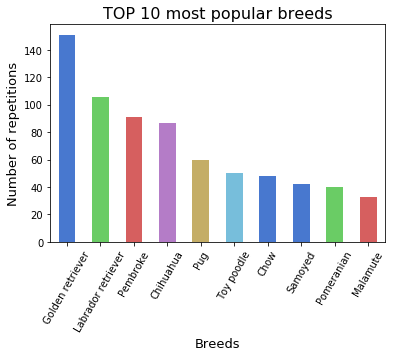

In [70]:
# There are a lot of dog breeds presented in our dataset.
# So, let's filter only breeds which appear at least 31 times in order to get our TOP 10 breeds.
df_breed = df_master.groupby("breed_prediction").filter(lambda x: len(x) > 31)

# Plot the graph
df_breed.breed_prediction.value_counts().plot(kind = "bar")
plt.title("TOP 10 most popular breeds", fontsize = 16)
plt.xlabel("Breeds", fontsize = 13)
plt.ylabel("Number of repetitions", fontsize = 13);
plt.xticks(rotation = 60);

# What are the most popular dogs' names?

In [71]:
df_master.name.value_counts()

Lucy          11
Cooper        10
Oliver        10
Charlie       10
Penny          9
Tucker         9
Winston        8
Sadie          8
Lola           8
Daisy          7
Toby           7
Stanley        6
Jax            6
Bo             6
Oscar          6
Koda           6
Bailey         6
Bella          6
Louis          5
Bentley        5
Rusty          5
Buddy          5
Scout          5
Milo           5
Leo            5
Archie         4
Larry          4
Jeffrey        4
Brody          4
Clarence       4
              ..
Pete           1
Jerome         1
Kuyu           1
Jomathan       1
Longfellow     1
Glacier        1
Bloop          1
Tedders        1
William        1
Gerbald        1
Bruiser        1
Meyer          1
Callie         1
Goose          1
Pippin         1
Lillie         1
Sobe           1
Brad           1
Pluto          1
Jordy          1
Sora           1
Bauer          1
Mike           1
Holly          1
Reptar         1
Severus        1
Kyro           1
Ziva          

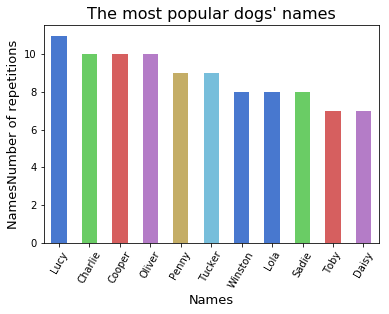

In [72]:
# There are a lot of dogs' names. So, let's filter only the names which appear at least 7 times
df_name = df_master.groupby("name").filter(lambda x: len(x) >= 7)
# Plot the graph
df_name.name.value_counts().plot(kind = "bar")
plt.title("The most popular dogs' names", fontsize = 16)
plt.xlabel("Names", fontsize = 13)
plt.ylabel("NamesNumber of repetitions", fontsize = 13);
plt.xticks(rotation = 60);

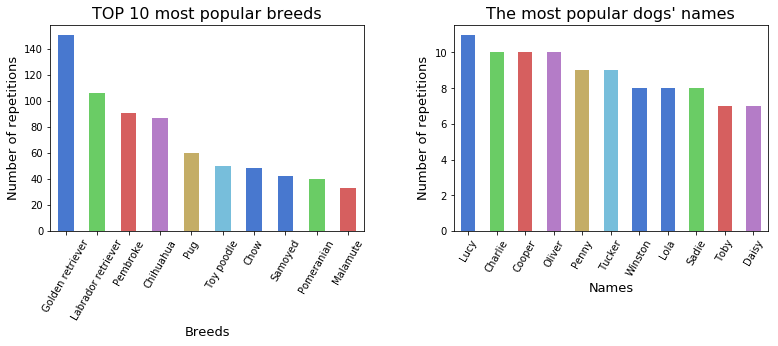

In [73]:
# Create a new figure
plt.figure(1, figsize=(12, 6))  

# Add a subplot to the current figure.
plt.subplot(121)
df_breed.breed_prediction.value_counts().plot(kind = "bar")
plt.title("TOP 10 most popular breeds", fontsize = 16)
plt.xlabel("Breeds", fontsize = 13)
plt.ylabel("Number of repetitions", fontsize = 13)
plt.xticks(rotation = 60);

# Add a subplot to the current figure.
plt.subplot(122)
df_name.name.value_counts().plot(kind = "bar")
plt.title("The most popular dogs' names", fontsize = 16)
plt.xlabel("Names", fontsize = 13)
plt.ylabel("Number of repetitions", fontsize = 13)
plt.xticks(rotation = 60);

plt.tight_layout(pad = 5)

# What are the most rated breeds among the most popular?

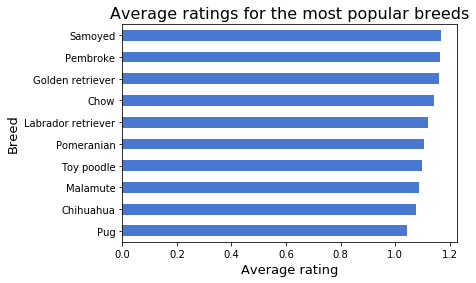

In [74]:
df_breed.groupby("breed_prediction")["rating"].mean().sort_values().plot(kind = "barh", color = "#4878CF")
plt.title("Average ratings for the most popular breeds", fontsize = 16)
plt.xlabel("Average rating", fontsize = 13)
plt.ylabel("Breed", fontsize = 13);

# Is there a relationship between ratings and number of likes/retweets?

Rating & Likes [[1.         0.45756505]
 [0.45756505 1.        ]]
Rating & Retweets [[1.         0.35369206]
 [0.35369206 1.        ]]


Text(0,0.5,'# of likes/retweets')

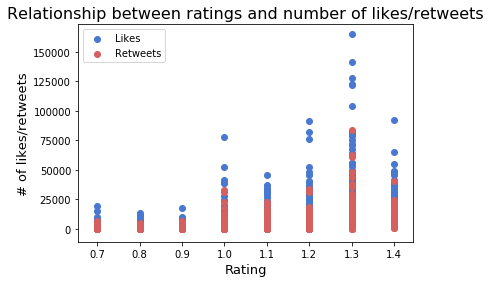

In [75]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.scatter(df_master['rating'], df_master['favorite_count'], label = 'Likes', color = "#4878CF");
ax.scatter(df_master['rating'], df_master['retweet_count'], label = 'Retweets', color = "#D65F5F");
ax.legend(loc='upper left');

print ("Rating & Likes", np.corrcoef(df_master['rating'], df_master['favorite_count']))
print ("Rating & Retweets", np.corrcoef(df_master['rating'], df_master['retweet_count']))

plt.title("Relationship between ratings and number of likes/retweets", fontsize = 16)
plt.xlabel("Rating", fontsize = 13)
plt.ylabel("# of likes/retweets", fontsize = 13)

# What is the average number of likes and retweets per dog stage?

In [76]:
df_master.groupby("dog_stage")["favorite_count"].mean()

dog_stage
doggo      18690.191781
floofer    10662.777778
pupper      7148.777273
puppo      22883.666667
Name: favorite_count, dtype: float64

In [77]:
df_master.groupby("dog_stage")["retweet_count"].mean()

dog_stage
doggo      6525.410959
floofer    3941.000000
pupper     2392.386364
puppo      6922.875000
Name: retweet_count, dtype: float64

In [78]:
likes_bars = df_master.groupby("dog_stage")["favorite_count"].mean().tolist()
retweets_bars = df_master.groupby("dog_stage")["retweet_count"].mean().tolist()
likes_bars, retweets_bars

([18690.19178082192,
  10662.777777777777,
  7148.777272727273,
  22883.666666666668],
 [6525.41095890411, 3941.0, 2392.3863636363635, 6922.875])

In [79]:
dog_stages = ["doggo", "floofer", "pupper", "puppo"]
dog_stages

['doggo', 'floofer', 'pupper', 'puppo']

In [80]:
xpos1 = np.arange(len(dog_stages))
xpos1

array([0, 1, 2, 3])

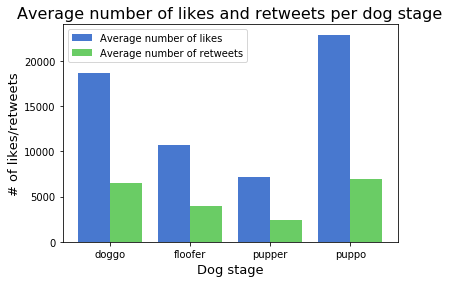

In [81]:
plt.xticks(xpos1, dog_stages)
plt.bar(xpos1-0.2, likes_bars, width = 0.4, label = "Average number of likes")
plt.bar(xpos1+0.2, retweets_bars, width = 0.4, label = "Average number of retweets")
plt.legend();

plt.title("Average number of likes and retweets per dog stage", fontsize = 16)
plt.xlabel("Dog stage", fontsize = 13)
plt.ylabel("# of likes/retweets", fontsize = 13);

# What is the average number of likes and retweets per breed?

In [82]:
df_breed.groupby("breed_prediction")["favorite_count"].mean()

breed_prediction
Chihuahua              8590.448276
Chow                   9195.104167
Golden retriever      12039.794702
Labrador retriever    11853.924528
Malamute              10457.909091
Pembroke              11024.395604
Pomeranian             7639.050000
Pug                    6144.800000
Samoyed               13389.642857
Toy poodle             6490.320000
Name: favorite_count, dtype: float64

In [83]:
df_breed.groupby("breed_prediction")["retweet_count"].mean()

breed_prediction
Chihuahua             2815.310345
Chow                  2645.104167
Golden retriever      3546.894040
Labrador retriever    3700.509434
Malamute              3171.030303
Pembroke              3018.384615
Pomeranian            2661.050000
Pug                   1864.116667
Samoyed               4573.476190
Toy poodle            2190.400000
Name: retweet_count, dtype: float64

In [84]:
likes_breed = df_breed.groupby("breed_prediction")["favorite_count"].mean().tolist()
retweets_breed = df_breed.groupby("breed_prediction")["retweet_count"].mean().tolist()
likes_breed, retweets_breed

([8590.448275862069,
  9195.104166666666,
  12039.794701986755,
  11853.924528301886,
  10457.90909090909,
  11024.395604395604,
  7639.05,
  6144.8,
  13389.642857142857,
  6490.32],
 [2815.310344827586,
  2645.1041666666665,
  3546.8940397350993,
  3700.509433962264,
  3171.030303030303,
  3018.3846153846152,
  2661.05,
  1864.1166666666666,
  4573.476190476191,
  2190.4])

In [85]:
dog_breed = df_breed.breed_prediction.unique()
dog_breed.sort()
dog_breed

array(['Chihuahua', 'Chow', 'Golden retriever', 'Labrador retriever',
       'Malamute', 'Pembroke', 'Pomeranian', 'Pug', 'Samoyed',
       'Toy poodle'], dtype=object)

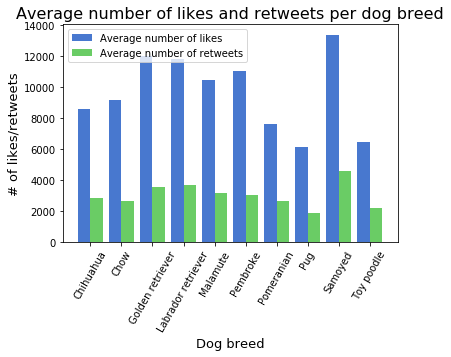

In [86]:
xpos2 = np.arange(len(dog_breed))
xpos2

plt.xticks(xpos2, dog_breed)
plt.xticks(rotation = 60)
plt.bar(xpos2-0.2, likes_breed, width = 0.4, label = "Average number of likes")
plt.bar(xpos2+0.2, retweets_breed, width = 0.4, label = "Average number of retweets")
plt.legend(loc = "upper left");

plt.title("Average number of likes and retweets per dog breed", fontsize = 16)
plt.xlabel("Dog breed", fontsize = 13)
plt.ylabel("# of likes/retweets", fontsize = 13);

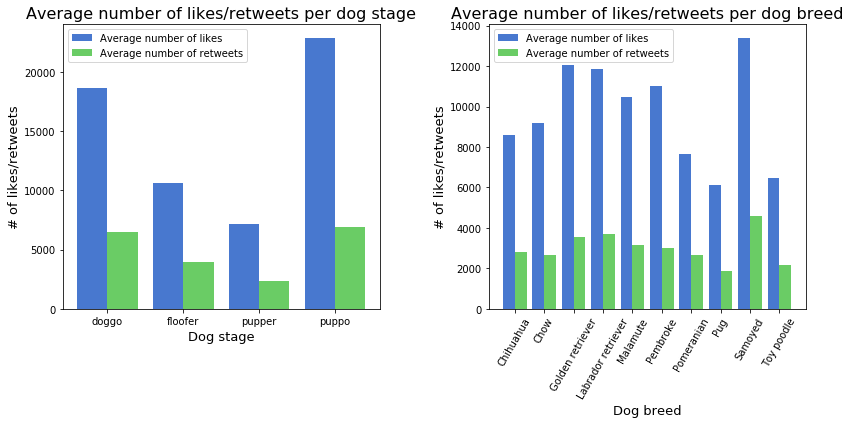

In [87]:
# Create a new figure
plt.figure(1, figsize=(12, 6))


# Add a subplot to the current figure.
plt.subplot(121)

xpos1 = np.arange(len(dog_stages))
xpos1
plt.xticks(xpos1, dog_stages)
plt.bar(xpos1-0.2, likes_bars, width = 0.4, label = "Average number of likes")
plt.bar(xpos1+0.2, retweets_bars, width = 0.4, label = "Average number of retweets")
plt.legend(loc = "upper left");

plt.title("Average number of likes/retweets per dog stage", fontsize = 16)
plt.xlabel("Dog stage", fontsize = 13)
plt.ylabel("# of likes/retweets", fontsize = 13);

# Add a subplot to the current figure.
plt.subplot(122)
xpos2 = np.arange(len(dog_breed))
xpos2
plt.xticks(xpos2, dog_breed)
plt.xticks(rotation = 60)
plt.bar(xpos2-0.2, likes_breed, width = 0.4, label = "Average number of likes")
plt.bar(xpos2+0.2, retweets_breed, width = 0.4, label = "Average number of retweets")
plt.legend(loc = "upper left");

plt.title("Average number of likes/retweets per dog breed", fontsize = 16)
plt.xlabel("Dog breed", fontsize = 13)
plt.ylabel("# of likes/retweets", fontsize = 13);

plt.tight_layout()

# What is the best time to make a tweet?

In [88]:
df_master.index.hour.value_counts()

1     270
0     245
2     208
16    192
3     164
17    163
23    108
18    107
15     89
4      86
19     84
20     79
22     72
21     69
5      24
14      9
6       4
13      2
Name: timestamp, dtype: int64

In [89]:
# There is a big variety of hours.
# So, let's filter only hours which appeared at least more than 70 times in order to
# avoid a bias of an average out of a small number of values

df_hours = df_master.groupby(df_master.index.hour).filter(lambda x: len(x) > 70)

In [90]:
df_hours.index.hour.value_counts()

1     270
0     245
2     208
16    192
3     164
17    163
23    108
18    107
15     89
4      86
19     84
20     79
22     72
Name: timestamp, dtype: int64

In [91]:
df_hours.groupby(df_hours.index.hour)["favorite_count"].mean()

timestamp
0     14042.248980
1      8390.062963
2      5221.812500
3      4884.603659
4      3449.581395
15    10556.078652
16    14025.708333
17     9104.006135
18    10954.327103
19     8371.333333
20     8486.734177
22     8332.458333
23    10215.675926
Name: favorite_count, dtype: float64

In [92]:
df_hours.groupby(df_hours.index.hour)["retweet_count"].mean()

timestamp
0     3867.457143
1     2522.103704
2     1928.384615
3     1596.024390
4     1195.860465
15    3227.269663
16    3750.161458
17    2559.055215
18    4164.364486
19    2871.976190
20    2882.670886
22    2665.819444
23    3064.259259
Name: retweet_count, dtype: float64

In [93]:
likes_hours = df_hours.groupby(df_hours.index.hour)["favorite_count"].mean().tolist()
retweet_hours = df_hours.groupby(df_hours.index.hour)["retweet_count"].mean().tolist()
likes_hours, retweet_hours

([14042.248979591837,
  8390.062962962964,
  5221.8125,
  4884.6036585365855,
  3449.5813953488373,
  10556.078651685393,
  14025.708333333334,
  9104.006134969326,
  10954.327102803738,
  8371.333333333334,
  8486.73417721519,
  8332.458333333334,
  10215.675925925925],
 [3867.457142857143,
  2522.1037037037036,
  1928.3846153846155,
  1596.0243902439024,
  1195.860465116279,
  3227.2696629213483,
  3750.1614583333335,
  2559.0552147239264,
  4164.3644859813085,
  2871.9761904761904,
  2882.6708860759495,
  2665.8194444444443,
  3064.259259259259])

In [94]:
hours = df_hours.index.hour.unique().tolist()
hours.sort()
hours

[0, 1, 2, 3, 4, 15, 16, 17, 18, 19, 20, 22, 23]

In [95]:
xpos_hours = np.arange(len(hours))
xpos_hours

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

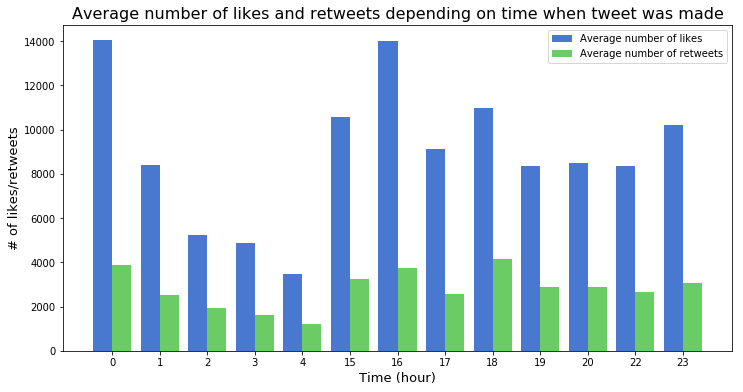

In [96]:
plt.figure(1, figsize=(12, 6))

plt.xticks(xpos_hours, hours)

plt.bar(xpos_hours-0.2, likes_hours, width = 0.4, label = "Average number of likes")
plt.bar(xpos_hours+0.2, retweet_hours, width = 0.4, label = "Average number of retweets")
plt.legend();

plt.title("Average number of likes and retweets depending on time when tweet was made", fontsize = 16)
plt.xlabel("Time (hour)", fontsize = 13)
plt.ylabel("# of likes/retweets", fontsize = 13);

# IDEAL TWEET

**Time** - 00:00 or 16:00 or 18:00<br>
**Rating** - High <br>
**Dog stage** - Puppo <br>
**Dog breed** - Samoyed <br>